# Статистика, DS-поток
## Практическое задание 2. Свойства оценок

In [ ]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

---

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

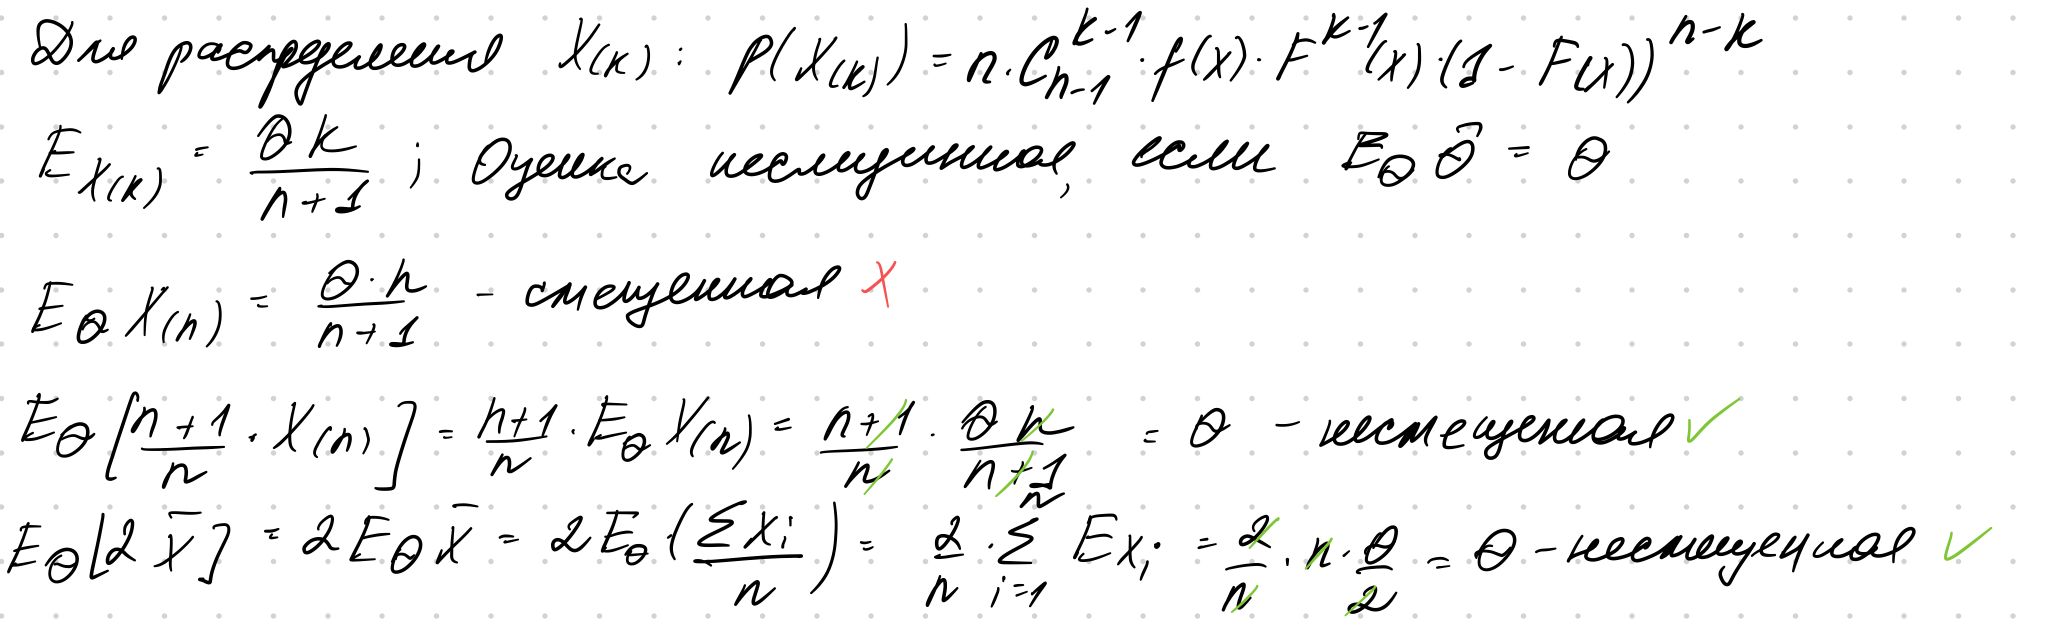

**Ответ:** $\frac{n+1}{n}X_{(n)}, 2\overline{X}$ - несмещённые оценки

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на лекции.

**Решение:**

*Рассмотрим распределение U[0,1]*

In [39]:
k = 500
y1 = 0
y2 = 1
y3 = 2

theta_1 = lambda X: X.max(axis=1)
theta_2 = lambda X: X.max(axis=1) * (n+1)/ n
theta_3 = lambda X: 2 * X.mean(axis=1)

In [30]:
def draw_thetas(X, n):
    t1, t2, t3 = theta_1(X), theta_2(X), theta_3(X)
    plt.figure(figsize=(16, 6))

    plt.scatter(t1, np.zeros(k) + y1, alpha=0.1, s=100, color='c', label='$X_{(n)}$')
    plt.scatter(t1.mean(), y1, marker='*', s=200, color='w', edgecolors='black')
    
    plt.scatter(t2, np.zeros(k) + y2, alpha=0.1, s=100, color='g', label='$\\frac{n+1}{n} X_{(n)}$')
    plt.scatter(t2.mean(), y2, marker='*', s=200, color='w', edgecolors='black')
    
        
    plt.scatter(t3, np.zeros(k) + y3, alpha=0.1, s=100, color='b', label='$2\\overline{X}$')
    plt.scatter(t3.mean(), y3, marker='*', s=200, color='w', edgecolors='black')

    plt.vlines(1, y1, y3, color='r', label='Истинное значение')
    plt.title(f'Размер выборки = {n}')
    plt.yticks([])
    plt.legend(loc='lower right')

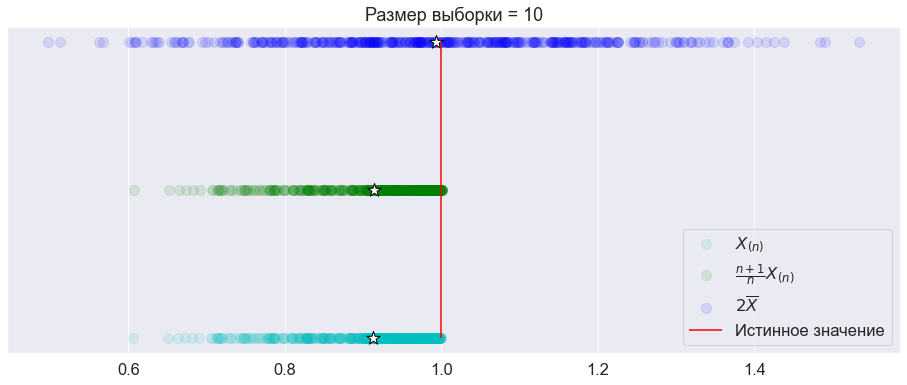

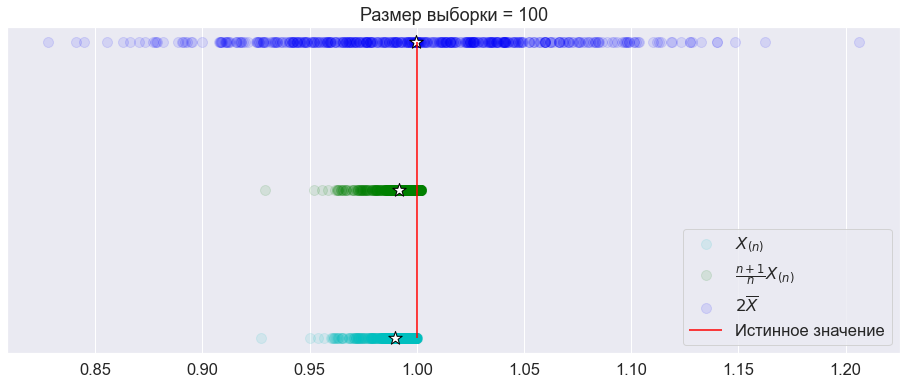

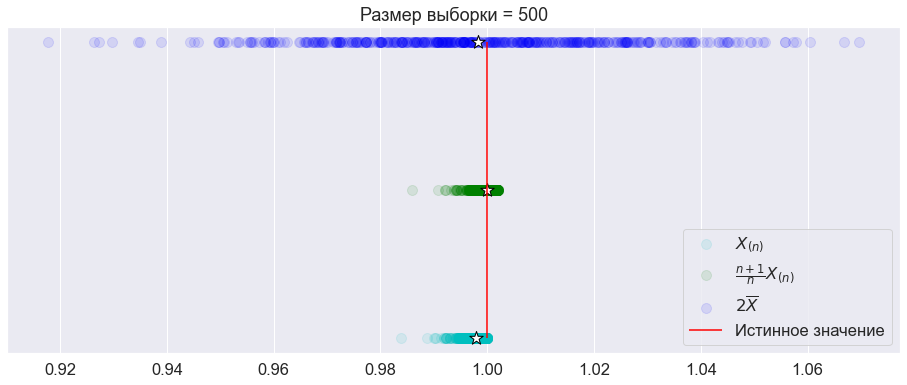

In [31]:
for i in [10, 100, 500]:
    X = sps.uniform.rvs(size=(k, i))
    draw_thetas(X, i)

*Видим, что с ростом размера выборки оценки приближаются как к друг другу, так и к истинному значению параметра - 1.*

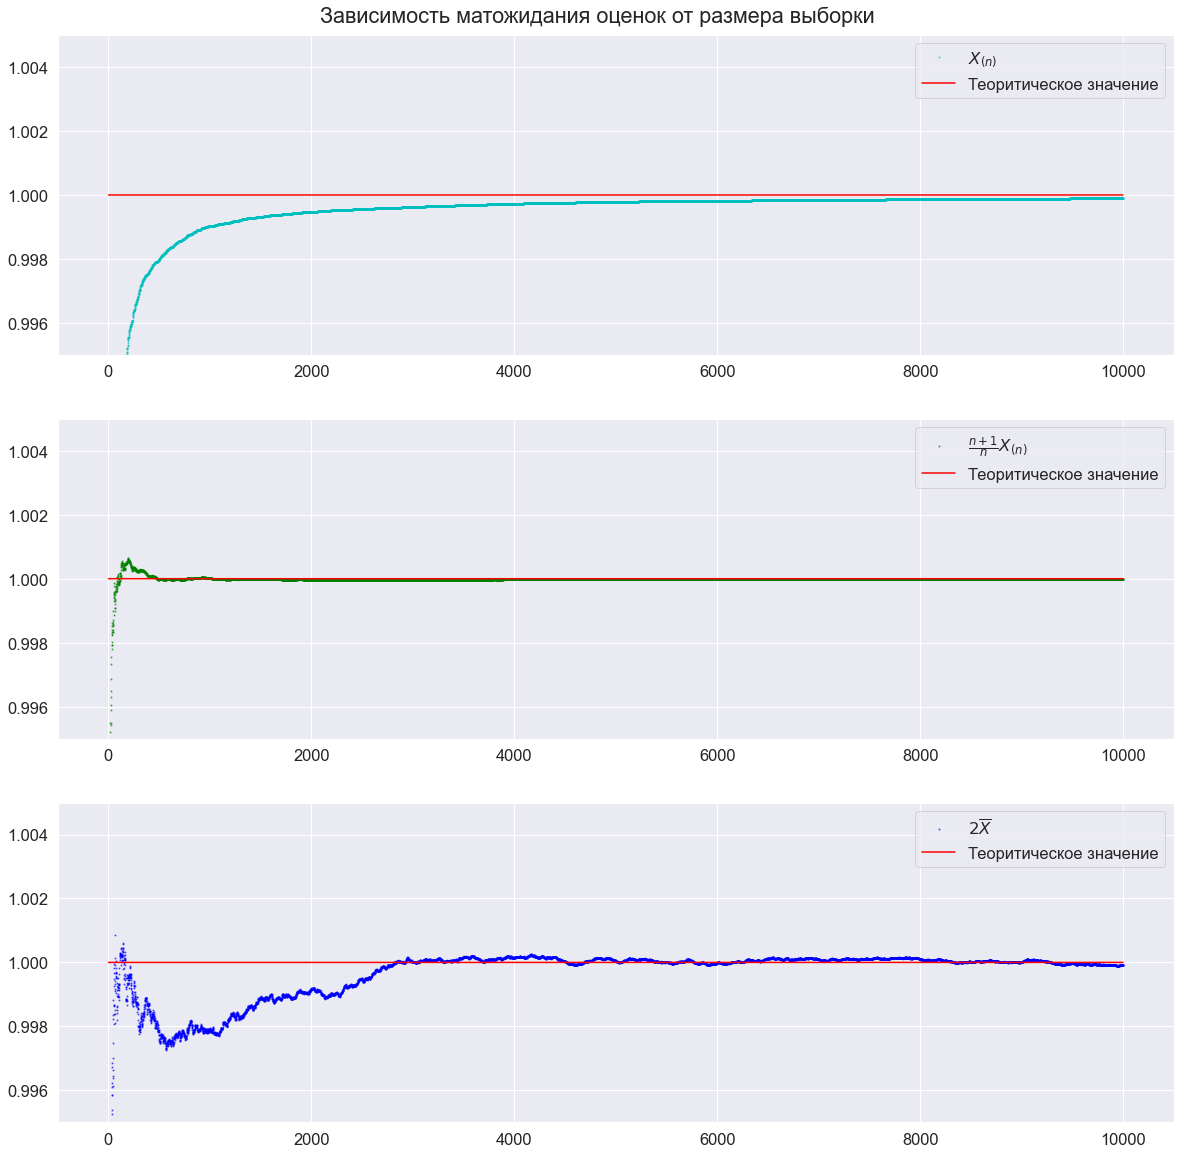

In [71]:
Y = np.maximum.accumulate(X, axis=1)
grid = np.arange(1, n+1)
theta_1_mean = Y.mean(axis=0)
theta_2_mean = (Y * (grid+1) / grid).mean(axis=0)
theta_3_mean = (2. * X.cumsum(axis=1) / grid).mean(axis=0)

fig, axs = plt.subplots(3, 1, figsize=(20, 20))

axs[0].plot(theta_1_mean, 'bs', ms=1,  alpha=0.5, label='$X_{(n)}$', c='c')
axs[0].plot(np.ones(n) * 1, c='r', label="Теоритическое значение")
axs[0].legend()
axs[0].set_ylim(1 - 0.005, 1 + 0.005)


axs[1].plot(theta_2_mean, 'bs', ms=1,  alpha=0.5, label='$\\frac{n+1}{n} X_{(n)}$', c='g')
axs[1].plot(np.ones(n) * 1, c='r', label="Теоритическое значение")
axs[1].legend()
axs[1].set_ylim(1 - 0.005, 1 + 0.005)

axs[2].plot(theta_3_mean, 'bs', ms=1,  alpha=0.5, label='$2\\overline{X}$', c='b')
axs[2].plot(np.ones(n) * 1, c='r', label="Теоритическое значение")
axs[2].legend()
axs[2].set_ylim(1 - 0.005, 1 + 0.005)

plt.suptitle('Зависимость матожидания оценок от размера выборки', y=0.9);

Несмещенность — свойство оценки в среднем быть равной параметру, который она оценивает.
Иначе говоря, при бесконечном повторении эксперимента в среднем оценка будет равна истинному
значению параметра. Проведенные эксперименты подтверждают свойство несмещенности для оценок
 — среднее значение этих оценок оказалось примерно равно истинному значению
параметра в отличии от смещенной оценки . Кроме того, можно заметить, что для смещенной
оценки смещение уменьшается с ростом размера выборки, иначе говоря, она является
асимптотически несмещенной.

**Вывод:** *Все три оценки с ростом размера выборки в среднем (по матожиданию) дают истинное значение параметра, несмотря на то, что только 2 последние теоретически являются несмещенными. Это визуализирует свойство несмещенности - оценка в среднем равна параметру с ростом выброки. Кроме того, для смещенной оценки $X_{n}$ смещение уменьшается с ростом размера выборки, иначе говоря, она является асимптотически несмещенной.*

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

In [3]:
theta = 1
size = 300 # размер выборок
samples_count = 500  # количество выборок

rand = sps.norm.rvs(size=(size, samples_count))
mean_sqs = np.cumsum(rand**2, axis=1) / np.arange(1, samples_count+1)
means = (np.cumsum(rand, axis=1) / np.arange(1, samples_count+1))**2
s2 = mean_sqs - means

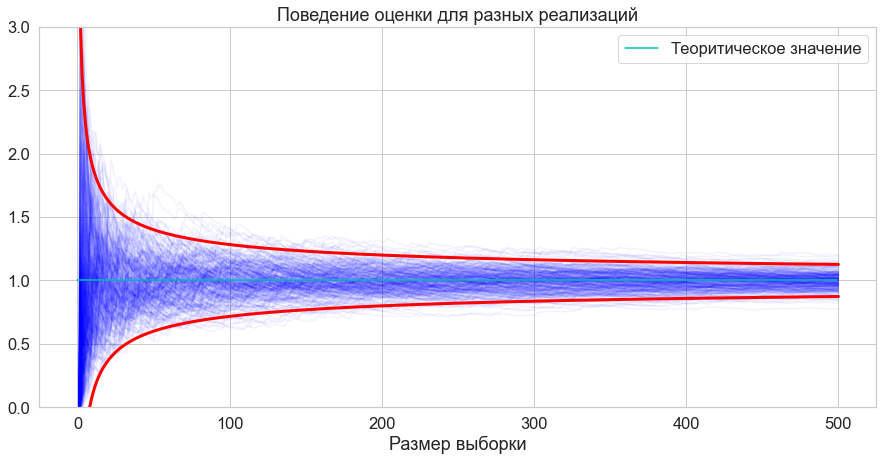

In [33]:
n_range = np.arange(samples_count) + 1
plt.figure(figsize=(15, 7))

for i in range(size):
    plt.plot(n_range, s2[i], color='blue', alpha=0.05)

plt.plot(n_range, theta + 2 * np.sqrt(2)/np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, theta - 2 * np.sqrt(2)/np.sqrt(n_range), color='red', lw=3)

plt.plot(np.ones(samples_count) * 1, c='c', label=r"Теоритическое значение")

plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 3))
plt.legend();

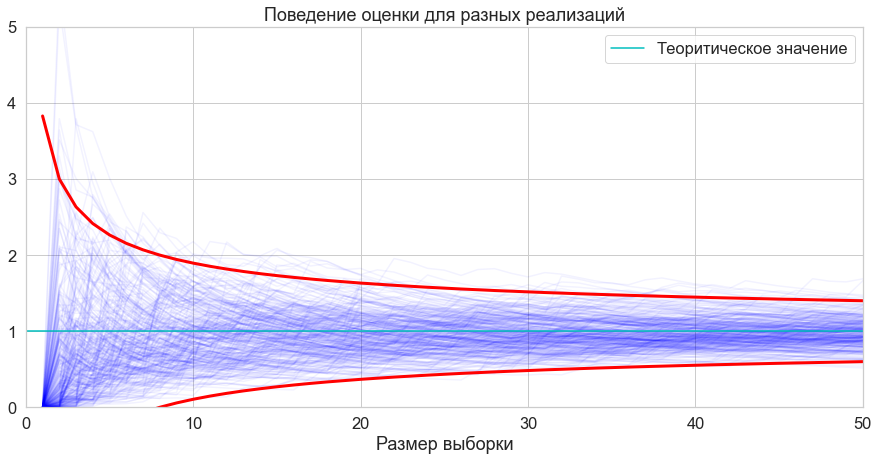

In [36]:
plt.figure(figsize=(15, 7))

for i in range(size):
    plt.plot(n_range, s2[i], color='blue', alpha=0.05)
    
plt.plot(n_range, theta + 2 * np.sqrt(2)/np.sqrt(n_range), color='red', lw=3)
plt.plot(n_range, theta - 2 * np.sqrt(2)/np.sqrt(n_range), color='red', lw=3)

plt.plot(np.ones(samples_count) * 1, c='c', label=r"Теоритическое значение")

plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.legend()
plt.ylim((0, 5))
plt.xlim((0, 50));

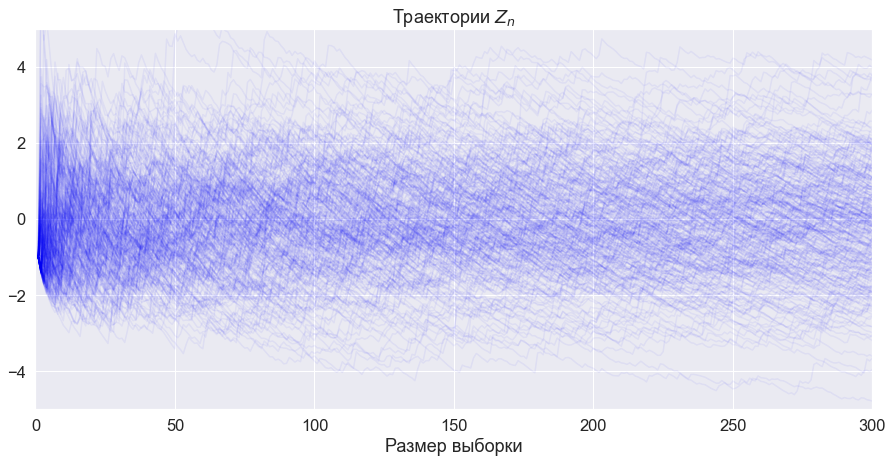

In [31]:
Zn = (s2 - theta) * np.sqrt(np.arange(1, samples_count+1)) / theta

plt.figure(figsize=(15, 7))

for i in range(size):
    plt.plot(np.arange(1, samples_count+1), Zn[i], color='blue', alpha=0.05)

plt.title('Траектории $Z_n$')
plt.xlabel('Размер выборки')
plt.ylim((-5, 5))
plt.xlim((0, size));

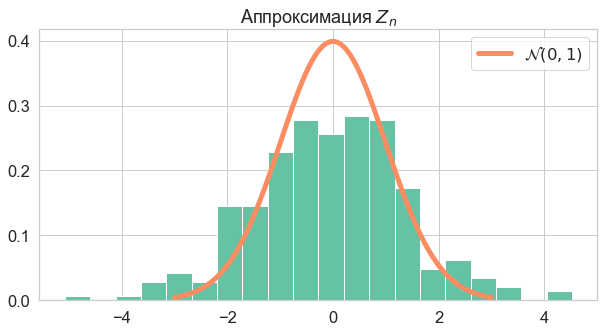

In [32]:
sns.set_style('whitegrid')

grid = np.linspace(-3, 3, 100)
plt.figure(figsize=(10, 5))

plt.hist(Zn[:, -1], bins=20, density=True)
plt.plot(grid, sps.norm.pdf(grid), lw=5, label="$\\mathcal{N}(0, 1)$")
plt.legend()
plt.title('Аппроксимация $Z_n$');

*При больших размерах выборки распределение похоже на стандратное нормальное.*

**Вывод:** 
*С ростом размера выборки траектории оценок сходятся к истинному значению параметра, об этом говорит свойство состоятельности.
Свойство асимптотической нормальности говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\sqrt{2}\sigma^2\left/\sqrt{n}\right.$. При малых размерах выборки асимтотические свойства не выполняются, в частности распределение оценки нельзя приблизить нормальным распределением. Приближения начинают выполняться начиная с размера выборки ~50*

___
## Задача 3.

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска для минимизаци определенной выше функции $f(X)$:

*Очевидно, что оптимальные параметры $a=1$ и $\sigma^2=1$*

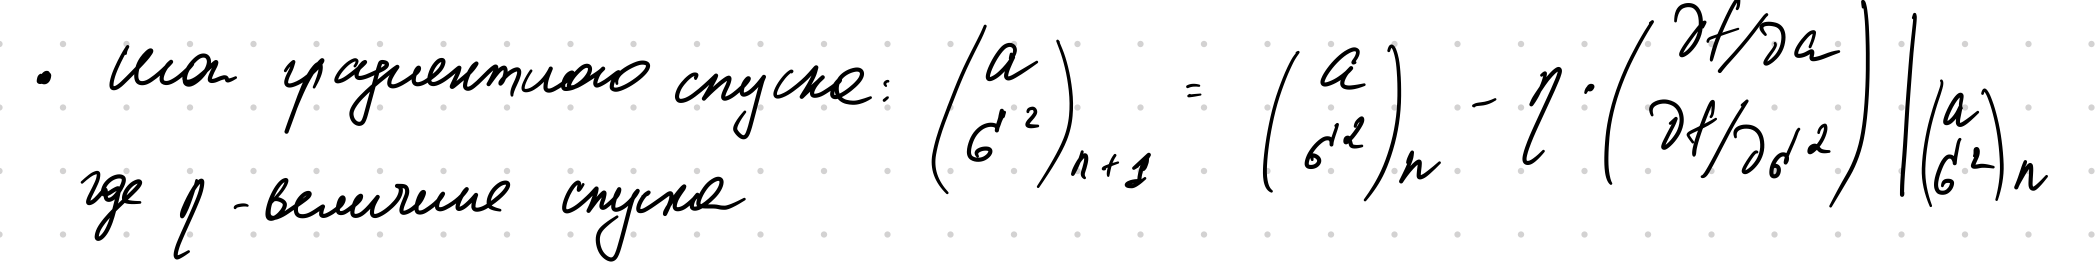

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

In [86]:
def f(theta):
    x, y = theta
    return np.array([2*(x - 1), 2*(y - 1)])

In [42]:
def gradient_descent(theta0, func_grad, eta, iter_count=15):
    theta = theta0
    history = [theta0]
    for _ in range(iter_count):
        theta = theta - eta * func_grad(theta)
        history.append(theta)
    return np.array(history)

In [45]:
n = 1000
theta_start = np.array([3, 5]) # произвольные начальные параметры
eta = 0.01

hist = gradient_descent(theta_start, f, eta, n);

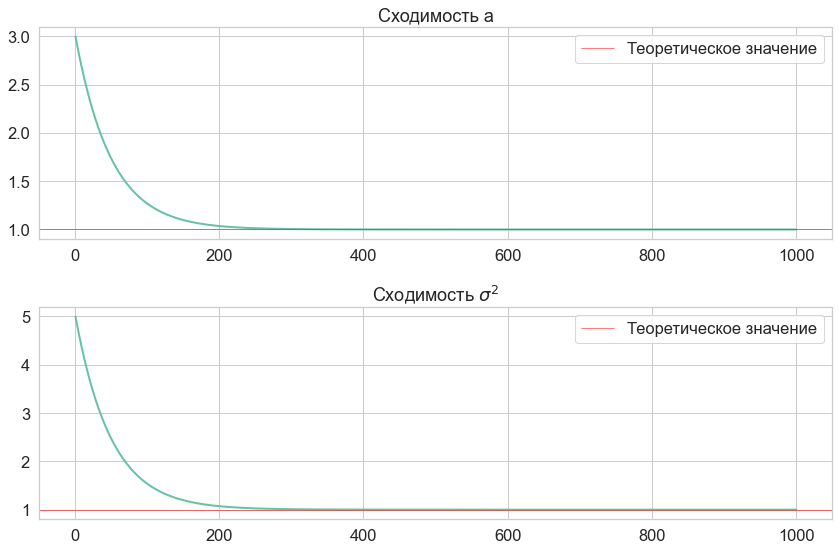

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(range(1, n+1), hist[:-1, 0], lw=2)
axs[0].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[0].set_title('Cходимость a')
axs[0].legend()

axs[1].plot(range(1, n+1), hist[:-1, 1], lw=2)
axs[1].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[1].set_title('Cходимость $\sigma^2$')
axs[1].legend()

plt.tight_layout()

*Наблюдается сходимость к оптимальным параметрам.*

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку, а для дисперсии &mdash; смещенную. 

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

In [109]:
def stoach_descent(theta0, func_grad, eta, ddof, iter_count=100):
    theta = theta0
    history = [theta0]
    for _ in range(iter_count):
        sample = sps.norm.rvs(loc=theta[0], scale=theta[1], size=(5,))
        theta1 = [sample.mean(), sample.var(ddof=ddof)]
        theta = theta - eta * func_grad(theta1)
        history.append(theta)
    return np.array(history)

In [110]:
hist = stoach_descent(theta_start, f, eta, 0, n);

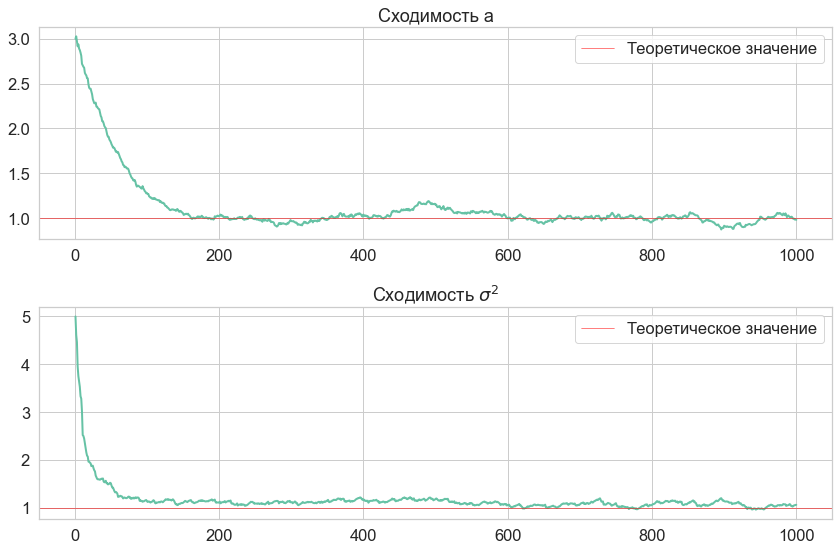

In [111]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(range(1, len(hist)), hist[:-1, 0], lw=2)
axs[0].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[0].set_title('Cходимость a')
axs[0].legend()

axs[1].plot(range(1, len(hist)), hist[:-1, 1], lw=2)
axs[1].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[1].set_title('Cходимость $\sigma^2$')
axs[1].legend()

plt.tight_layout()

*Cходимость для наблюдается, но предельные значения немноо отличаются от истинных*

Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии. Обратите внимание на параметр `ddof` в функции `np.var`. Поменялся ли результат?

In [112]:
hist = stoach_descent(theta_start, f, eta, 1, n);

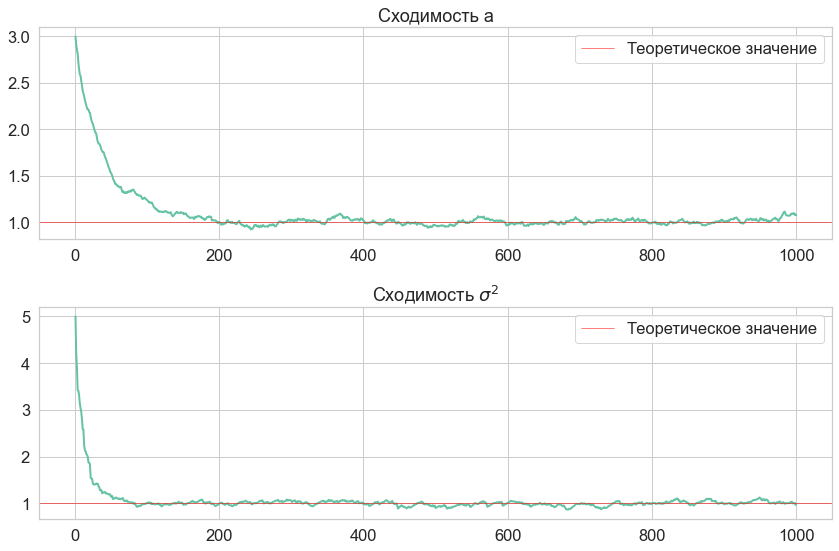

In [113]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

axs[0].plot(range(1, n+1), hist[:-1, 0], lw=2)
axs[0].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[0].set_title('Cходимость a')
axs[0].legend()

axs[1].plot(range(1, n+1), hist[:-1, 1], lw=2)
axs[1].axhline(1, c='r', lw=0.5, label='Теоретическое значение')
axs[1].set_title('Cходимость $\sigma^2$')
axs[1].legend()

plt.tight_layout()

*Теперь сходимость наблюдается к истинным значениям*

**Вывод:** *Эксперимент показал, что для градиентного спуска важно испольщовать несмещенную оценку. При использовании смещенной оценки сходимость наблюдалась к другому значению, а не к истинному*

___
## Задача 4.
В заключение вам предлагается реальная практическая задача.

На основе http://ecsocman.hse.ru/data/819/759/1219/Monte_Karlo_dlya_analitikov.pdf
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, используйте цикл по годам.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

In [25]:
n = 25
days = 365
c = 70
boarder_volume = 10**5
annual_spending = 2*10**8
times = 10**5

*Cлучайные величины:*

In [32]:
k = sps.norm(loc=0.42, scale=0.012).rvs((times, 1)) # Коэффициент нефтеотдачи
q = sps.norm(loc=10**4, scale=3000).rvs(size=(times, n)) # Темпы добычи из скважин
i = sps.norm(loc=0.1, scale = 0.012).rvs(size=(times, 1)) # Ставка дисконтирования
C = sps.triang(loc=90*10**6, c=1/3, scale=30*10**6).rvs(size=(times, n)) # Затраты на скважину

*Расчитаем, как быстро истощается месторождение:*

In [33]:
q_total = q.sum(axis=1).reshape((times, 1))
T = np.ceil((5 * np.log((k*q_total*days) / boarder_volume) + 1))

*Стоимость добытой нефти за всё время:*

In [34]:
d = (1 + i) * np.exp(0.2)
D = (1 - d**(-T)) / (1 - d **(-1))
NPV = c*days*k*q_total*D - T*annual_spending - C.sum(axis=1).reshape((times, 1))

*0.1-квантиль:*

In [35]:
sample_sorted = np.sort(NPV.ravel())
p01 = int(len(sample_sorted)*0.1)
x = sample_sorted[p01]
print(f'X = {x // 10**6} млн')

X = 744.0 млн


In [36]:
print(f'Среднее значение NPV: {sample_sorted.mean() // 10**6} млн')

Среднее значение NPV: 1682.0 млн


In [38]:
print(f'Вероятность NPV > 0: {(sample_sorted>0).sum()/len(sample_sorted)}')

Вероятность NPV > 0: 0.99281


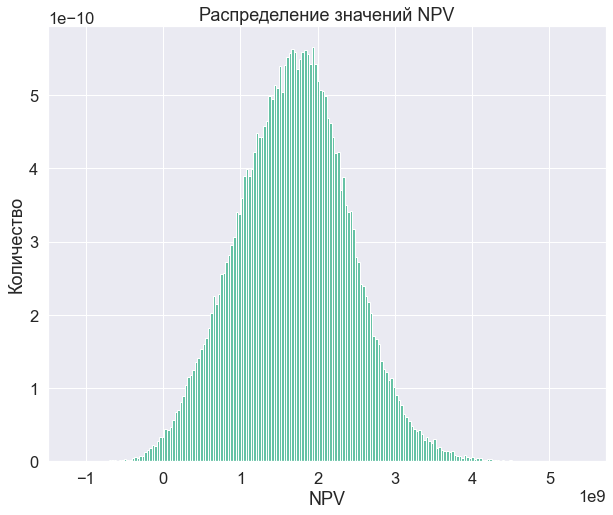

In [44]:
plt.figure(figsize=(10, 8))
plt.hist(sample_sorted, bins=200, density=True)
plt.title('Распределение значений NPV')
plt.ylabel('Количество')
plt.xlabel('NPV');

**Вывод:** *Я не уверена, что правильно поняла как использовать здесь метод Монте-Карло, запуталась в условии. Я получила, что NPV имеет распределение близкое к нормальному, и 99% значений - положительные*